In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
import SimpleITK as sitk  
#from radiomics.featureextractor import *
from sklearn import mixture
from skimage.feature import peak_local_max
from skimage import segmentation

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 

In [2]:

import csv
import SimpleITK as sitk

In [3]:
csv_ahl_post_process= '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/ahl_tmtv_2cm.csv'

with open(csv_ahl_post_process, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [4]:
csv_data[0]

['13011101051022',
 '1.2.840.113619.2.290.3.2831165510.988.1366867863.298',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_mask_pred_float.nii',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_mask.nii',
 '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/mot_an_apr 25_2013.csv',
 '504.31',
 '549.0999999999999',
 '44.78999999999991',
 '537.4658309104416',
 '6.574494043433915',
 '431.1853429439361',
 '341.1390956053947',
 '-14.499941911931923',
 '-32.35527837929157']

In [5]:
truth = []
sous_seg = []
pourcent = []
for row in csv_data : 
    truth.append(float(row[6]))
    sous_seg.append(float(row[11]))
    pourcent.append(float(row[13]))

5.503447839941503


Text(0.5, 1.0, 'Bland Altman after watershed')

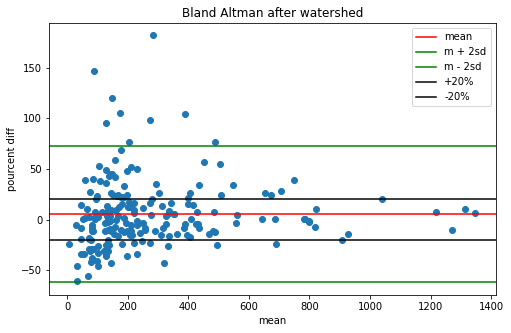

In [6]:
mean = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
plt.axhline(moy, c='r', label='mean')
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(20, c='black', label = '+20%' )
plt.axhline(-20, c='black', label = '-20%' )
plt.scatter(mean, pourcent)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')

In [5]:
cpt = 0
for item in pourcent : 
    if item < 20 and item > -20 : 
        cpt += 1
cpt

NameError: name 'pourcent' is not defined

In [5]:
serie = csv_data[14]
serie

['13011101241013',
 '2.16.840.1.113669.632.20.540001.10003427750',
 '/media/deeplearning/Elements/AHL2011_NIFTI/2.16.840.1.113669.632.20.540001.10003427750_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/2.16.840.1.113669.632.20.540001.10003427750_mask_pred_float.nii',
 '/media/deeplearning/Elements/AHL2011_NIFTI/2.16.840.1.113669.632.20.540001.10003427750_nifti_mask.nii',
 '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/col_ju_jan 15_2013.csv',
 '808.25',
 '819.0400000000001',
 '10.790000000000077',
 '976.8087101227138',
 '20.854773909398556',
 '785.6861526437569',
 '703.6327839817386',
 '-2.7916915999063483',
 '-12.94367040126958']

[3, 7, 16, 18]
label : 3
num sous sections : 0
label : 7
num sous sections : 0
label : 16
num sous sections : 2
label : 18
num sous sections : 41
60


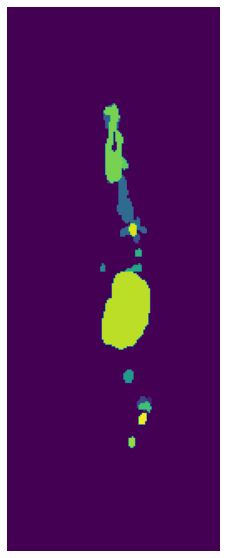

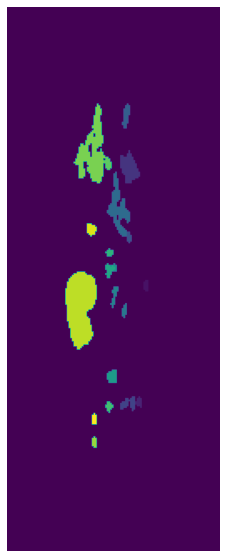

In [6]:
model = WatershedModel(serie[3], serie[2], type = '3d')

ws_array, num_featu = model.watershed_model(0.5)

#mip_imshow(ws_array, 0, cmap='viridis', type='mask', vmin= None, vmax = None)
binary_img = model.get_binary_threshold_mask_img(0.5)
binary_array = model.remove_small_roi(binary_img)

labelled_array, num_label = model.get_labelled_threshold_mask_array(binary_array)

mip_imshow(labelled_array, 0, cmap='viridis', type='mask', vmin= None, vmax = None)
mip_imshow(labelled_array, 90, cmap='viridis', type='mask', vmin= None, vmax = None)

In [6]:
len(label_coordonate[18])

41

In [7]:
from library_dicom.dicom_processor.tools.threshold_mask import *

ws_array = get_threshold_matrix(ws_array, model.pet_array, 60, 0.41)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [8]:
np.where(ws_array == 37)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

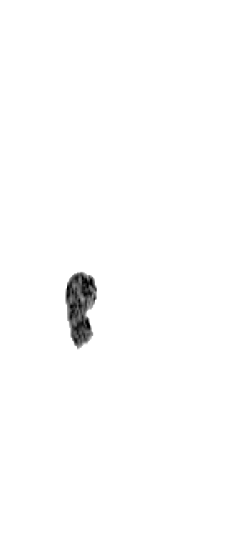

In [8]:
suv_matrix = np.zeros(model.size_matrix)
suv_matrix[np.where(labelled_array == 18)] = model.pet_array[np.where(labelled_array == 18)]
mip_imshow(suv_matrix, 90, cmap='Greys', type='pet', vmin= 2, vmax = 10)

In [9]:
from skimage.morphology import local_minima

localMin = local_minima(suv_matrix, allow_borders=False)

In [10]:
localMin

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [11]:
np.where(localMin==True)

(array([78, 82, 82, 83, 83, 83, 83, 83, 84, 84, 84, 84, 84, 85, 85, 85, 85,
        85, 85, 85, 85, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 88, 88, 88,
        88, 88, 88, 89, 89, 90, 90]),
 array([78, 79, 81, 61, 72, 76, 76, 82, 62, 74, 76, 78, 78, 62, 63, 67, 70,
        74, 75, 75, 78, 66, 70, 71, 73, 80, 67, 68, 70, 72, 76, 66, 68, 71,
        72, 74, 76, 74, 75, 71, 72]),
 array([157, 143, 146, 140, 141, 146, 159, 141, 144, 133, 142, 150, 155,
        146, 139, 140, 136, 153, 135, 148, 147, 150, 141, 148, 130, 144,
        132, 135, 163, 158, 157, 150, 143, 156, 138, 141, 147, 155, 149,
        153, 147]))

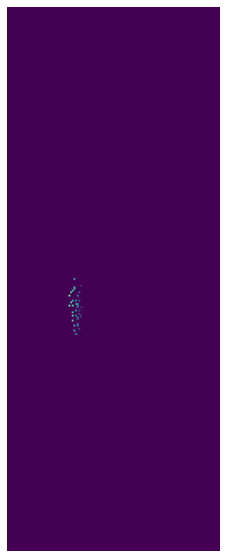

In [14]:
marker, num = ndimage.label(localMin, structure=np.ones((3,3,3)))
mip_imshow(marker, 90, cmap='viridis', type='mask', vmin= None, vmax = None)

In [15]:
num

41

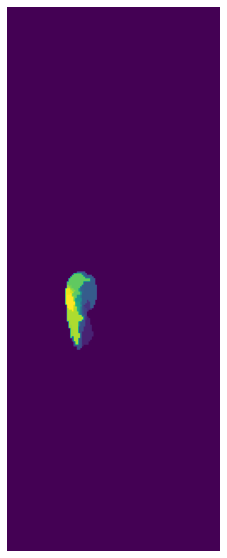

In [16]:
ws_array = segmentation.watershed(suv_matrix, marker, mask = suv_matrix)
mip_imshow(ws_array, 90, cmap='viridis', type='mask', vmin= None, vmax = None)

In [60]:
np.where(ws_array ==19)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [13]:
local_Min = peak_local_max(-suv_matrix, indices=False, min_distance = 5)

In [14]:
marker, num = ndimage.label(local_Min)

In [15]:
num

1

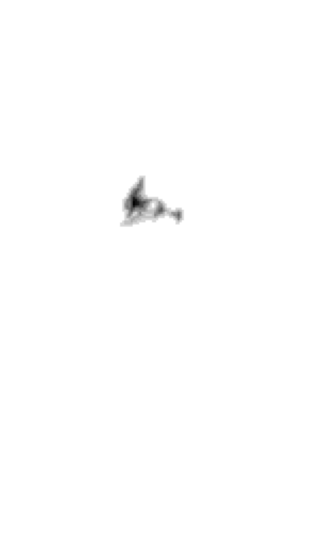

In [12]:
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage import segmentation
from skimage.morphology import local_maxima 

D = ndimage.distance_transform_edt(suv_matrix)
mip_imshow(D, 90, cmap='Greys', type='pet', vmin= 0, vmax = 4)

In [13]:
struct = np.ones((3,3,3), dtype=bool)
localMax = local_maxima(D,  selem = struct , indices = False)
localMax_2 = peak_local_max(D, indices= False, min_distance = 5)

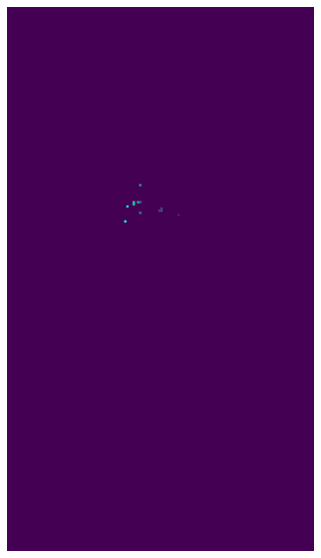

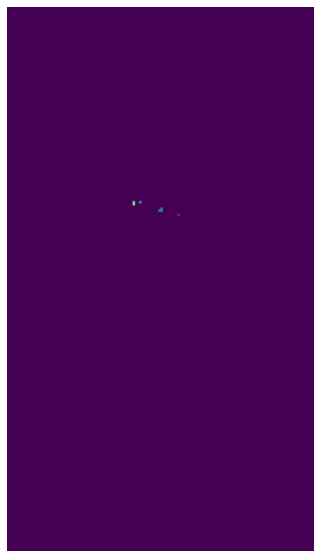

9
4


In [14]:
marker_1 , num_mark_1 = ndimage.label(localMax)
marker_2, num_mark_2 = ndimage.label(localMax_2) 
mip_imshow(marker_1, 90, cmap='viridis', type='mask', vmin= 0, vmax = 4)
mip_imshow(marker_2, 90, cmap='viridis', type='mask', vmin= 0, vmax = 4)
print(num_mark_1)
print(num_mark_2)

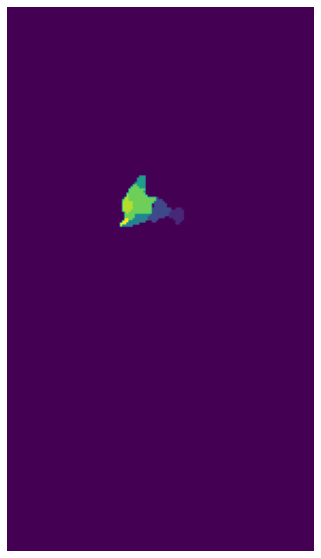

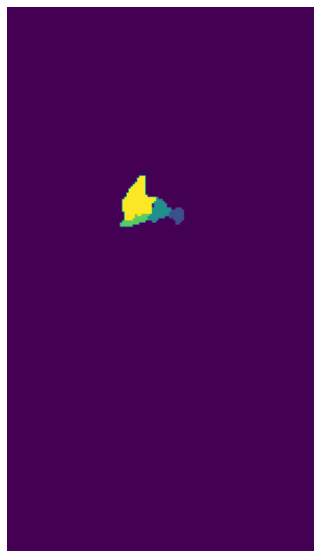

In [15]:
ws_array = segmentation.watershed(-D, marker_1, mask = suv_matrix) 
ws_array_2 = segmentation.watershed(-D, marker_2, mask = suv_matrix) 

mip_imshow(ws_array, 90, cmap='viridis', type='mask', vmin= 0, vmax = 4)
mip_imshow(ws_array_2, 90, cmap='viridis', type='mask', vmin= 0, vmax = 4)

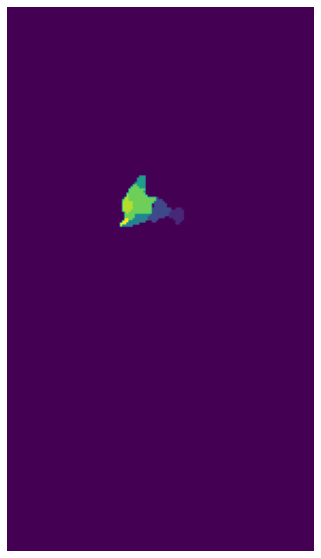

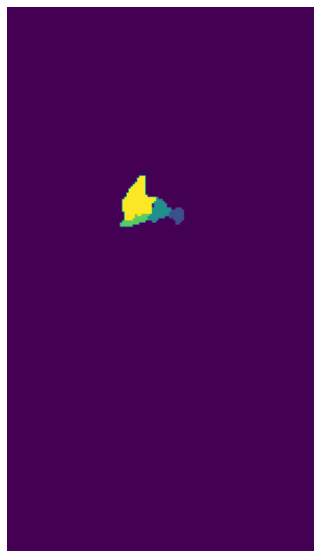

In [16]:
from library_dicom.dicom_processor.tools.threshold_mask import *
seuil = get_threshold_matrix(ws_array, suv_matrix,9, 0.41)
seuil_2 = get_threshold_matrix(ws_array_2, suv_matrix, 4, 0.41)

mip_imshow(seuil, 90, cmap='viridis', type='mask', vmin= 0, vmax = 4)
mip_imshow(seuil_2, 90, cmap='viridis', type='mask', vmin= 0, vmax = 4)

In [17]:
print(len(np.where(seuil != 0)[0]))
print(len(np.where(seuil_2 != 0)[0]))

2382
2382


In [105]:
2382*0.064

152.448

In [55]:
#mask_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
#pet_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

mask_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
pet_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

In [56]:
#watershed
model = WatershedModel(mask_path, pet_path, type='4d')

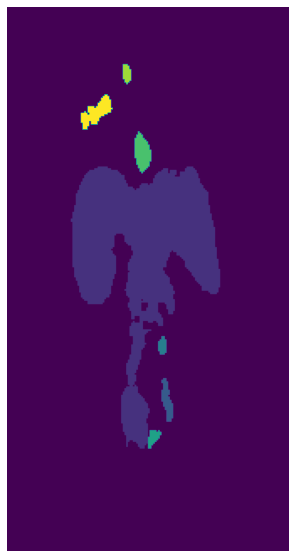

In [57]:
binary_img= model.get_binary_threshold_mask_img(3)
binary_array = model.remove_small_roi(binary_img)

labelled_array, num_label = model.get_labelled_threshold_mask_array(binary_array)

mip_imshow(labelled_array, 90, cmap='viridis', type='mask', vmin=None, vmax = None)

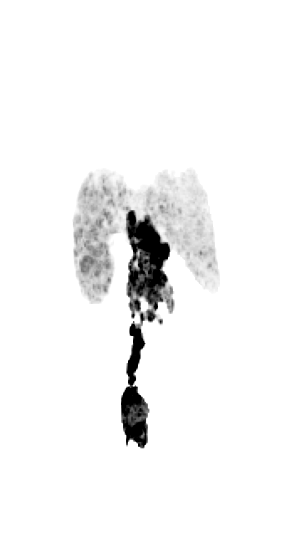

In [60]:
suv_mat = np.zeros(model.size_matrix)
suv_mat[np.where(labelled_array == 1)] = model.pet_array[np.where(labelled_array == 1)]
mip_imshow(suv_mat, 90, cmap='Greys', type='pet', vmin= 4, vmax = 20)

In [87]:
a = np.array([0, 1, 5, 3, 4])
localMax = peak_local_max(a, indices=False)

In [88]:
localMax

array([False, False,  True, False, False])

In [89]:
localMin = peak_local_max(-a, indices=False)
localMin

array([False, False, False,  True, False])

In [90]:
local_minima(a)

array([ True, False, False,  True, False])

In [10]:
matrix, label = model.watershed_model(3)

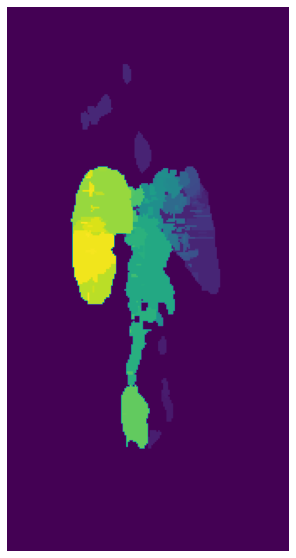

In [11]:
mip_imshow(matrix, 90, cmap='viridis', type='mask', vmin=None, vmax=None)

In [12]:
label

285

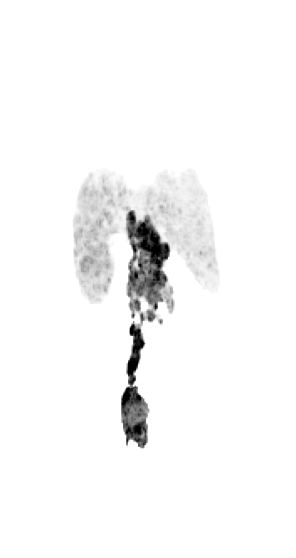

In [6]:
new_mask= np.zeros((168,168,324))
new_mask[np.where(labelled_array == 1)] = model.pet_array[np.where(labelled_array== 1)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)
new = np.transpose(np.flip(new_mask, axis = 2), (2,1,0)) #coronal
vol_angle = scipy.ndimage.interpolation.rotate(new, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 25)

In [7]:
D = ndimage.distance_transform_edt(new_mask)

localMax = peak_local_max(D, indices = True)
localMax2 = peak_local_max(D, indices = False)

print(len(localMax))

structure = np.ones((3,3,3))

structure
#markers, num_features = ndimage.label(localMax2, structure=np.ones((3,3,3)) )

1212


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [8]:
markers, num_features = ndimage.label(localMax2, structure=structure)

In [18]:
num_features

11

In [19]:
labels = segmentation.watershed(-D,markers,mask=new_mask)

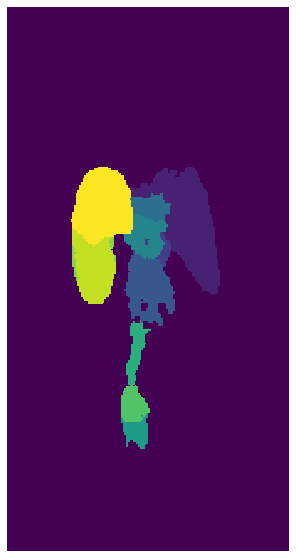

In [20]:
mip_imshow(labels, 90, cmap='viridis', type='mask', vmin = None, vmax = None)

In [ ]:
#WATERSHED MODEL

In [63]:
model = WatershedModel(mask_path, pet_path, type = '4d')

In [64]:
binary_array = model.get_binary_threshold_mask_array(0.41)
binary_img = model.get_binary_threshold_mask_img(0.41)

labelled_img = model.get_labelled_threshold_mask_img(binary_img)
labelled_array = model.get_labelled_threshold_mask_array(labelled_img)

model.label_stat_results(labelled_img)

In [65]:
ws_array, label= model.watershed_model(0.41)

In [66]:
label

62

In [67]:
model.rois_details(ws_array, 62)

{1: 270.8148037776849,
 2: 5.523785964594455,
 3: 9.15654610347189,
 4: 1.6422066381226759,
 5: 209.256936766844,
 6: 237.92090717771254,
 7: 21.995616183340083,
 8: 37.37264197667059,
 9: 8.758435403320938,
 10: 3.9811070015095176,
 11: 0.9952767503773794,
 12: 0.09952767503773793,
 13: 0.34834686263208275,
 14: 0.04976383751886897,
 15: 573.3291720548893,
 16: 700.2767215655241,
 17: 2.5379557134623174,
 18: 20.950575595443834,
 19: 391.8902204610931,
 20: 336.4035416275542,
 21: 500.6739692773407,
 22: 71.46087067709584,
 23: 0.19905535007547587,
 24: 0.9455129128585104,
 25: 0.04976383751886897,
 26: 0.04976383751886897,
 27: 0.5474022127075586,
 28: 0.6966937252641655,
 29: 0.09952767503773793,
 30: 0.04976383751886897,
 31: 0.09952767503773793,
 32: 15.227734280773904,
 33: 0.04976383751886897,
 34: 1.9905535007547588,
 35: 0.39811070015095174,
 36: 0.04976383751886897,
 37: 0.19905535007547587,
 38: 0.04976383751886897,
 39: 0.09952767503773793,
 40: 0.04976383751886897,
 41: 0.

In [71]:
ws_img = sitk.GetImageFromArray(ws_array.transpose())
ws_img.SetDirection(model.pet_direction)
ws_img.SetOrigin(model.pet_origin)
ws_img.SetSpacing(model.pet_spacing)

sitk.WriteImage(ws_img, '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/watershed_1.nii')


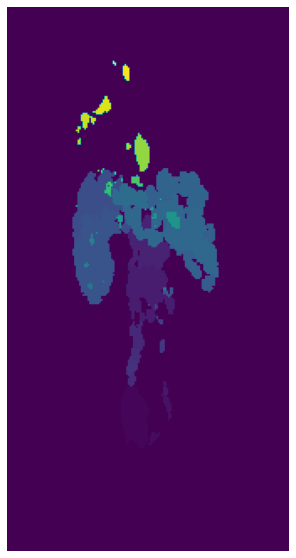

In [68]:
mip_imshow(ws_array, 90, cmap='viridis', type = 'mask')

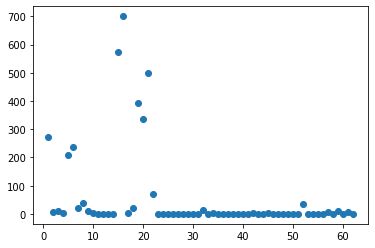

In [12]:
x = np.linspace(1, 62, 62)
x
vol = []
for i in range(1,62+1) : 
    vol.append(dict[i])
vol
plt.scatter(x,vol)

(array([53.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([4.97638375e-02, 7.00724596e+01, 1.40095155e+02, 2.10117851e+02,
        2.80140547e+02, 3.50163243e+02, 4.20185938e+02, 4.90208634e+02,
        5.60231330e+02, 6.30254026e+02, 7.00276722e+02]),
 <BarContainer object of 10 artists>)

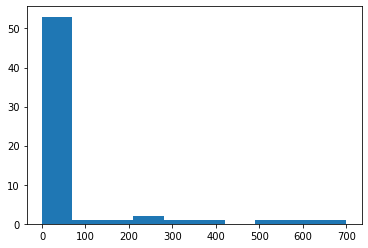

In [13]:
plt.hist(vol)

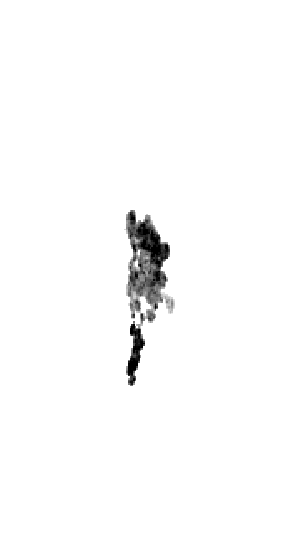

In [73]:
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_array == 5)] = model.pet_array[np.where(labelled_array== 5)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)
new = np.transpose(np.flip(new_mask_3D_5, axis = 2), (2,1,0)) #coronal
vol_angle = scipy.ndimage.interpolation.rotate(new, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 25)

#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

In [97]:
D = ndimage.distance_transform_edt(new_mask_3D_5)

localMax = peak_local_max(D, indices = True,  min_distance=20)
localMax2 = peak_local_max(D, indices = False, min_distance=20)
print(len(localMax))
print(localMax2)

21
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False 

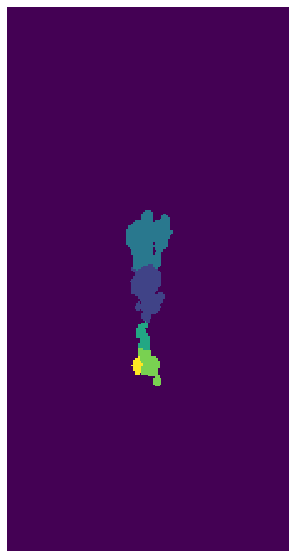

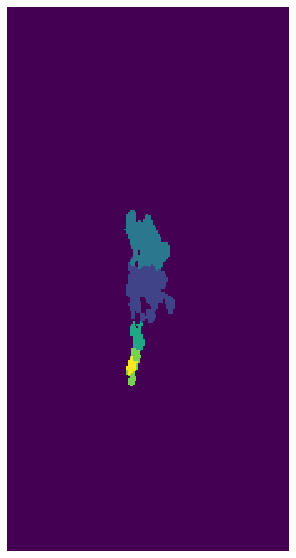

In [98]:
marker_array = ndimage.label(localMax2, structure=np.ones((3,3,3)))[0]
#marker_array = np.zeros((168, 168, 324))
#for marker in range(len(localMax)) : 
    #print(marker)
    #marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_5)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [101]:
np.where(labels ==5)

(array([90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
        92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
        93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
        93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
        93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
        95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
        95, 95, 95, 95, 96, 96], dtype=int64),
 array([78, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 78, 78, 78, 78,
        78, 79, 79, 79, 79, 80, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76,
        77, 77, 77, 77, 77, 77, 78, 78, 7

In [15]:
volume

7572.264572221183

In [ ]:
#label 11

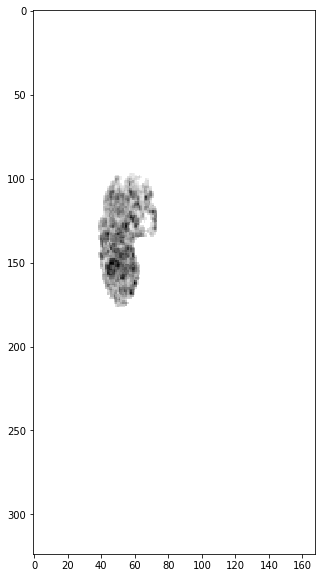

In [105]:
new_mask_3D_11 = np.zeros((168,168,324))
new_mask_3D_11[np.where(labelled_array == 11)] = model.pet_array[np.where(labelled_array== 11)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)

new_11 = np.transpose(np.flip(new_mask_3D_11, axis = 2), (2,1,0)) #coronal

vol_angle = scipy.ndimage.interpolation.rotate(new_11, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)

f = plt.figure(figsize=(10,10))
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 15)
#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

In [103]:
D = ndimage.distance_transform_edt(new_mask_3D_11)

localMax = peak_local_max(D, indices = True,  min_distance=20)
localMax2 = peak_local_max(D, indices = False, min_distance=20)
print(len(localMax))
print(localMax2)

2
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False F

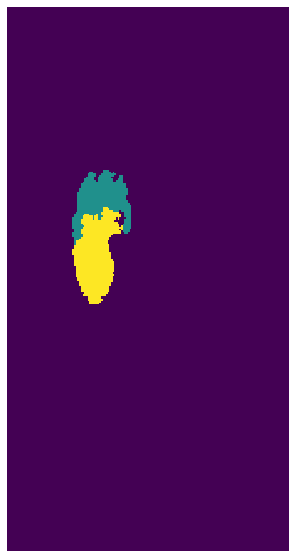

In [106]:
marker_array = ndimage.label(localMax2, structure=np.ones((3,3,3)))[0]
#marker_array = np.zeros((168, 168, 324))
#for marker in range(len(localMax)) : 
    #print(marker)
    #marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_11)
#mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [ ]:
#label 13

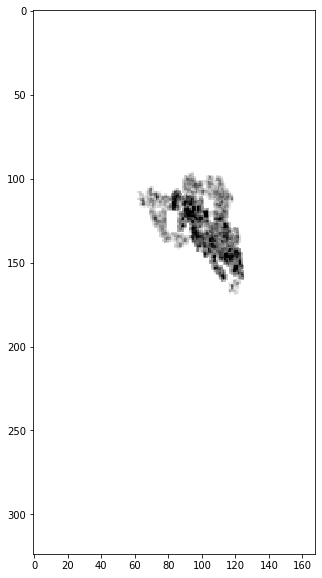

In [142]:
new_mask_3D_13 = np.zeros((168,168,324))
new_mask_3D_13[np.where(labelled_array == 13)] = model.pet_array[np.where(labelled_array== 13)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)

new_13 = np.transpose(np.flip(new_mask_3D_13, axis = 2), (2,1,0)) #coronal

vol_angle = scipy.ndimage.interpolation.rotate(new_13, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)

f = plt.figure(figsize=(10,10))
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 10)
#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

In [143]:
D = ndimage.distance_transform_edt(new_mask_3D_13)

localMax = peak_local_max(D, indices = True,  min_distance=20)
localMax2 = peak_local_max(D, indices = False, min_distance=20)
print(len(localMax))
print(localMax2)

9
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False F

In [146]:
num_features

5

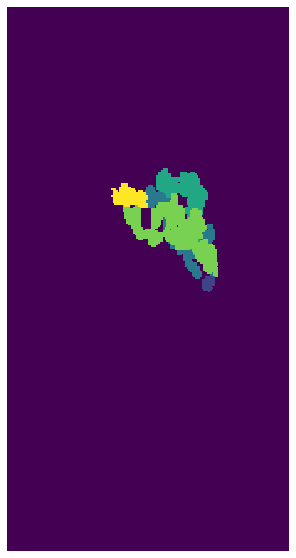

In [145]:
marker_array, num_features = ndimage.label(localMax2, structure=np.ones((3,3,3)))
#marker_array = np.zeros((168, 168, 324))
#for marker in range(len(localMax)) : 
    #print(marker)
    #marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_13)
#mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [35]:
numero_labels

[1, 5, 11, 13, 43]

In [36]:
labelled_seuil_array = sitk.GetArrayFromImage(labelled_seuil).transpose()

In [83]:
liste = []
for i in range(1,3) :
    liste.append(np.where(labelled_seuil_array == i))

In [85]:
liste[0]

(array([83, 83, 83, ..., 99, 99, 99]),
 array([79, 79, 80, ..., 88, 88, 89]),
 array([82, 83, 83, ..., 90, 91, 90]))

In [87]:
test = np.zeros((168, 168, 324))
test[liste[0]] = 1

In [88]:
np.where(test == 1)

(array([83, 83, 83, ..., 99, 99, 99]),
 array([79, 79, 80, ..., 88, 88, 89]),
 array([82, 83, 83, ..., 90, 91, 90]))

In [196]:
#LABEL 1

In [37]:
new_mask_3D_1 = np.zeros((168,168,324))
new_mask_3D_1[np.where(labelled_seuil_array == 1)] = model.pet_array[np.where(labelled_seuil_array == 1)]

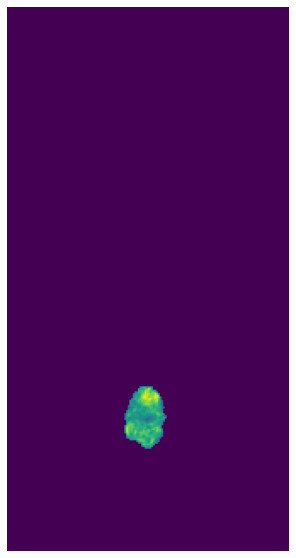

In [38]:
mip_imshow(new_mask_3D_1, 0, cmap = 'viridis', type = 'mask' )

In [39]:
D = ndimage.distance_transform_edt(new_mask_3D_1)
D.shape

(168, 168, 324)

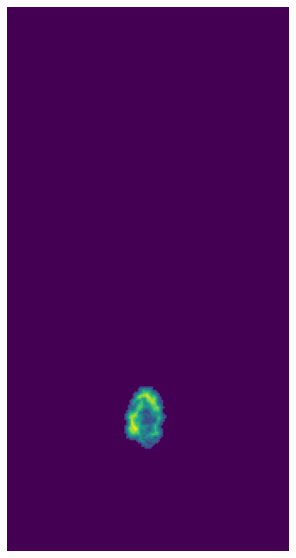

In [40]:
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

In [41]:
from skimage.feature import peak_local_max
localMax = peak_local_max(D, indices = True, min_distance=15)
localMax2 = peak_local_max(D, indices = False, min_distance=15)

In [42]:
localMax

array([[92, 76, 72],
       [94, 83, 92]])

In [43]:
marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1


0
1


In [45]:
import skimage as sk

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_1)

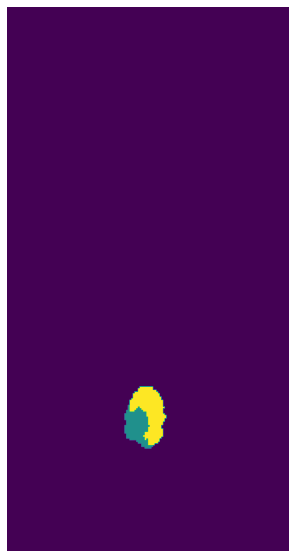

In [46]:
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

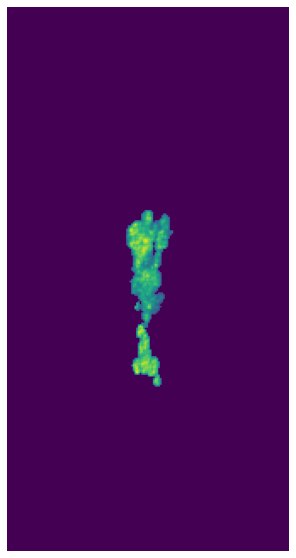

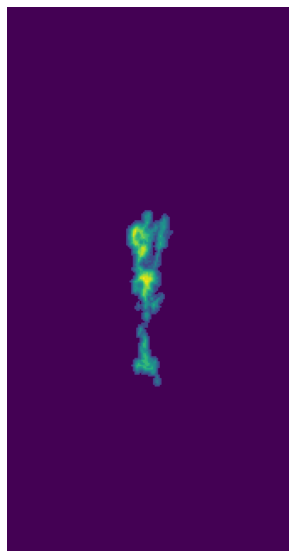

3


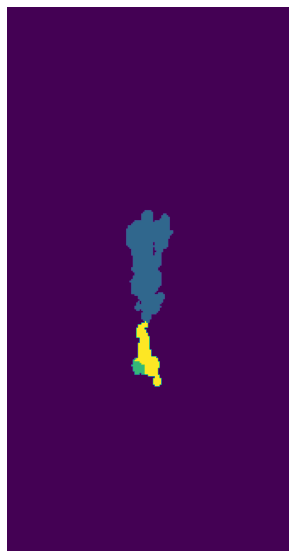

In [51]:
#LABEL 5 
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_seuil_array == 5)] = model.pet_array[np.where(labelled_seuil_array == 5)]
mip_imshow(new_mask_3D_5, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_5)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_5)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

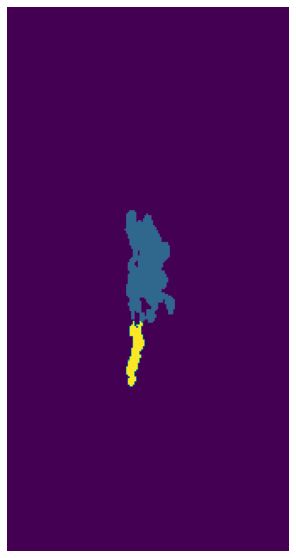

In [52]:
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

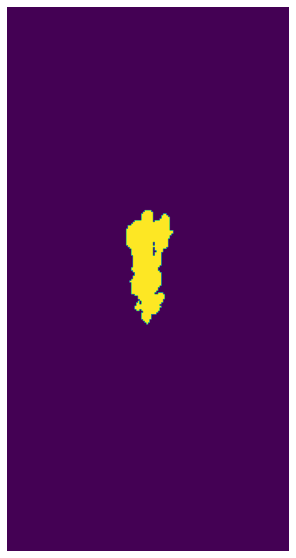

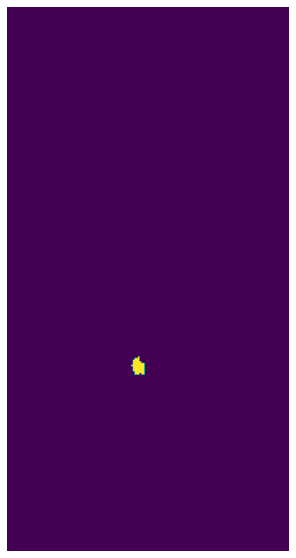

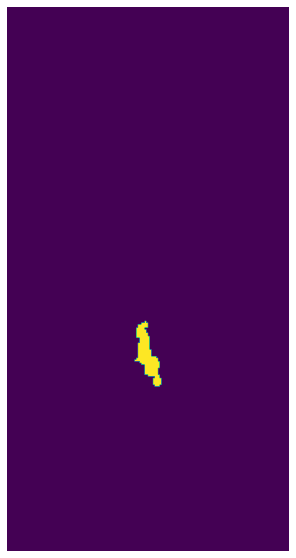

In [54]:
for label in range(1,4):
    new_mask = np.zeros((168, 168, 324))
    new_mask[np.where(labels == label)] = label 

    mip_imshow(new_mask, 0, cmap = 'viridis', type = 'mask')

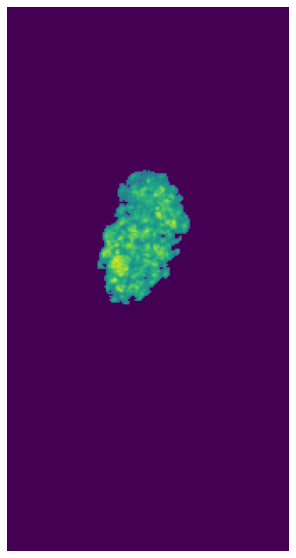

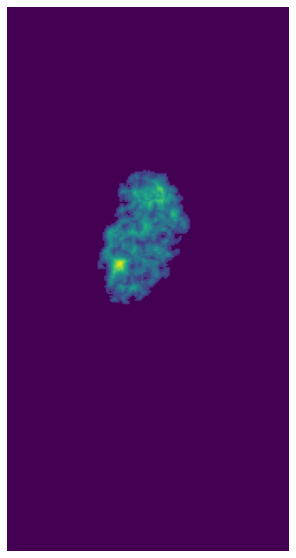

2


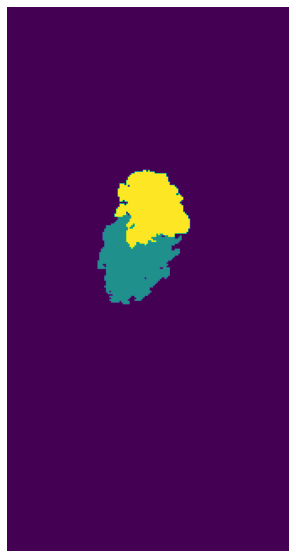

In [57]:
#label 11

new_mask_3D_11 = np.zeros((168,168,324))
new_mask_3D_11[np.where(labelled_seuil_array == 11)] = model.pet_array[np.where(labelled_seuil_array == 11)]
mip_imshow(new_mask_3D_11, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_11)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_11)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

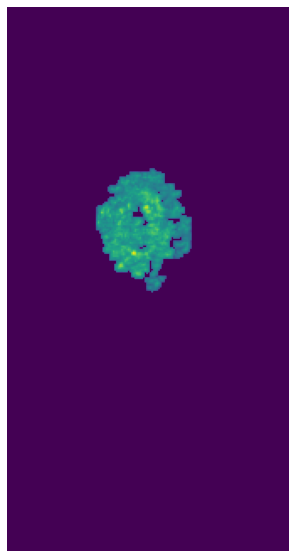

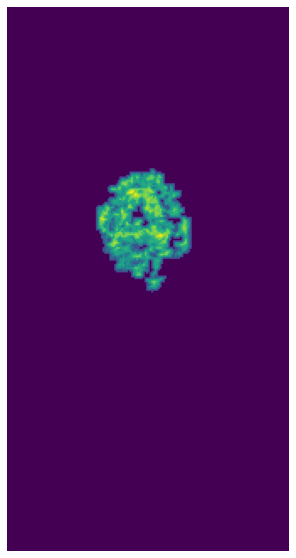

6


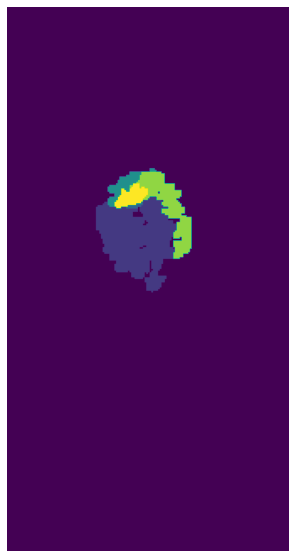

In [58]:
#label 13


new_mask_3D_13 = np.zeros((168,168,324))
new_mask_3D_13[np.where(labelled_seuil_array == 13)] = model.pet_array[np.where(labelled_seuil_array == 13)]
mip_imshow(new_mask_3D_13, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_13)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_13)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

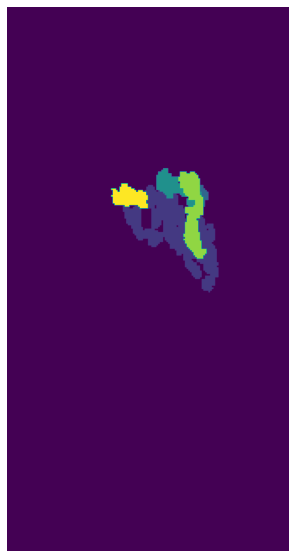

In [62]:
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

for label in range(1,7):
    new_mask = np.zeros((168, 168, 324))
    new_mask[np.where(labels == label)] = label 

    mip_imshow(new_mask, 0, cmap = 'viridis', type = 'mask')

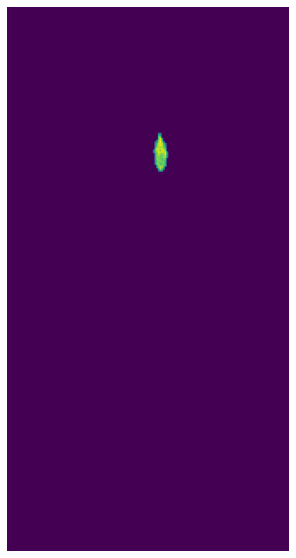

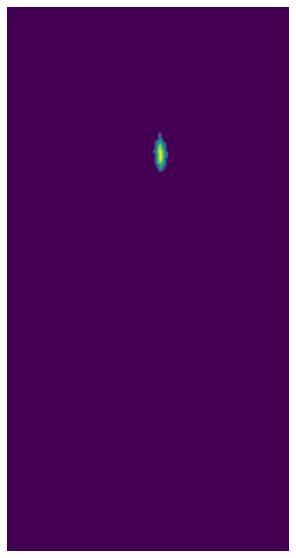

5


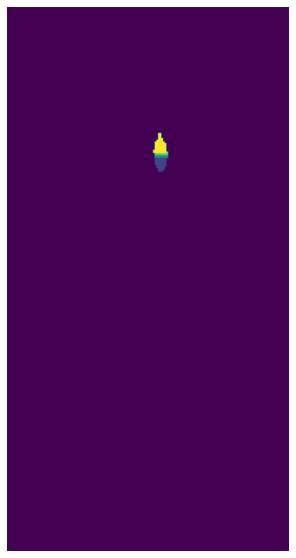

In [76]:
#LABEL 43

new_mask_3D_43 = np.zeros((168,168,324))
new_mask_3D_43[np.where(labelled_seuil_array == 43)] = model.pet_array[np.where(labelled_seuil_array == 43)]
mip_imshow(new_mask_3D_43, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_43)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_43)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')